# matplotlib 科研绘图
https://blog.csdn.net/irober/article/details/108279609


# 用于画α diversity的箱线图
## 箱线图教程位置
https://blog.csdn.net/p1306252/article/details/107502286
https://blog.csdn.net/weixin_40683253/article/details/87857194



## 单个测试

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## 读文件
df1 = pd.read_excel(r'E:\Work\分析项目\wxy\正式结果整理\16S+宏基因组\16S\文章内容保留\alpha_diversity_删点后.xlsx'
                    , header=0, index_col=0)
dfGroup = df1.groupby('GroupByTimeDiet')  # 按'GroupByTimeDiet'分组

dfGroup.groups.keys()  # 查看每个组的组名
dfGroup.groups  # 查看整个分组情况
df1

In [ ]:


## 按分组求每个α多样性指标的均值 存到新的df
MeanList = []
for i in df1.columns:
    if i != "GroupByTimeDiet":
        MeanList.append(df1.groupby('GroupByTimeDiet')[i].mean())
# 列表里的series合成df
MeanDf = pd.concat(MeanList, axis=1)
MeanDf

## 绘制箱线图bioplot 单个测试
"""新建列表，通过遍历每个箱子的series，把存储每个箱子的数值的series存进去"""
dfGroup.groups.keys()  # 每个分组的名字
boxList = []  # 存储画箱线图用的series
for i in dfGroup.groups.keys():
    """通过遍历每个组的组名，获得储存每个组的数据的series"""
    print(i)
    boxList.append(df1.observed_otus[df1.GroupByTimeDiet == i])

"""绘图部分"""
plt.rcParams['axes.facecolor'] = 'white'  # 图表背景颜色
plt.rc('font', family='Times New Roman')  # 修改全局字体为新罗马
colorList = ["#5EA0E9", "#3E4756", "#A2ACBD", "#E37D9D", "#A9486A"]
plt.figure(figsize=(5, 8))  # 设置画布的尺寸
plt.title("Observed species index", fontsize=30, loc='left')  # 标题，并设定字号大小、位置
plt.xticks(size=15)
# ylableName = i.capitalize() # 把字符串首字母大写
# plt.ylabel(ylableName,fontdict={'size': 20}) # 设置y轴 坐标名称
plt.yticks(size=15)
boxp = plt.boxplot(boxList, labels=dfGroup.groups.keys(), patch_artist=True, widths=0.5,
                   flierprops={"marker": "o", "markerfacecolor": "white", "markersize": 1},
                   medianprops={'color': 'black', 'linewidth': '1'}, showfliers=False)

[boxp['boxes'][i].set(facecolor=colorList[i], alpha=0.7) for i in range(len(boxList))]  # 列表表达式设置颜箱体色
# plt.savefig(r'E:\Work\分析项目\wxy\正式结果整理\16S+宏基因组\16S\文章内容保留\Observed species index.tiff',dpi=400)


## 一次绘制多个箱线图

### boxplot()
boxplot(

x, notch=None, sym=None, vert=None, whis=None,

positions=None, widths=None, patch_artist=None,

bootstrap=None, usermedians=None, conf_intervals=None,

meanline=None, showmeans=None, showcaps=None, showbox=None,

showfliers=None, boxprops=None, labels=None, flierprops=None,

medianprops=None, meanprops=None, capprops=None,

whiskerprops=None, manage_ticks=True, autorange=False,

zorder=None, *, data=None):


x：指定要绘制箱线图的数据，可以是一组数据也可以是多组数据；
notch：是否以凹口的形式展现箱线图，默认非凹口；
sym：指定异常点的形状，默认为蓝色的+号显示；
vert：是否需要将箱线图垂直摆放，默认垂直摆放；
whis：指定上下须与上下四分位的距离，默认为1.5倍的四分位差；
positions：指定箱线图的位置，默认为range(1, N+1)，N为箱线图的数量；
widths：指定箱线图的宽度，默认为0.5；
patch_artist：是否填充箱体的颜色，默认为False；
meanline：是否用线的形式表示均值，默认用点来表示；
showmeans：是否显示均值，默认不显示；
showcaps：是否显示箱线图顶端和末端的两条线，默认显示；
showbox：是否显示箱线图的箱体，默认显示；
showfliers：是否显示异常值，默认显示；
boxprops：设置箱体的属性，如边框色，填充色等；
labels：为箱线图添加标签，类似于图例的作用；
flierprops：设置异常值的属性，如异常点的形状、大小、填充色等；
medianprops：设置中位数的属性，如线的类型、粗细等；
meanprops：设置均值的属性，如点的大小、颜色等；
capprops：设置箱线图顶端和末端线条的属性，如颜色、粗细等；
whiskerprops：设置须的属性，如颜色、粗细、线的类型等；
manage_ticks：是否自适应标签位置，默认为True；
autorange：是否自动调整范围，默认为False；




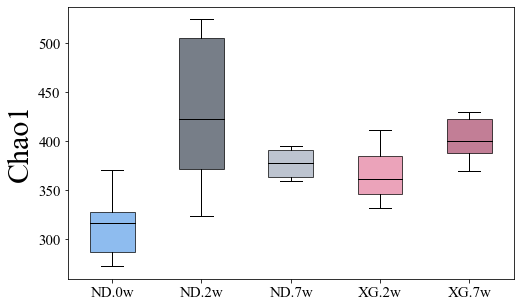

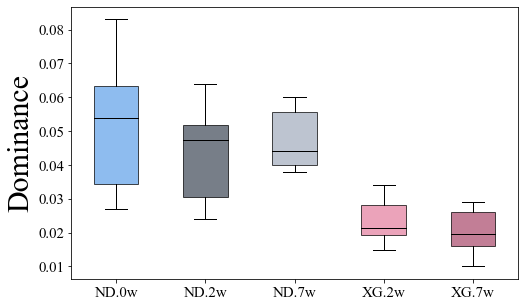

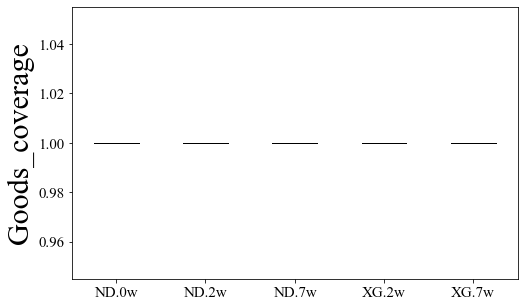

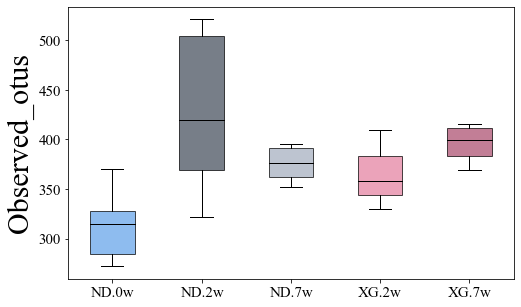

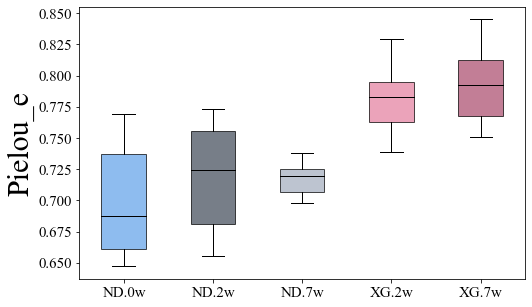

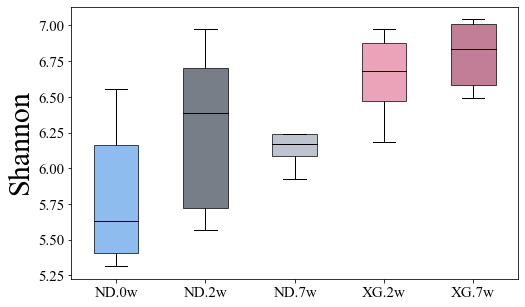

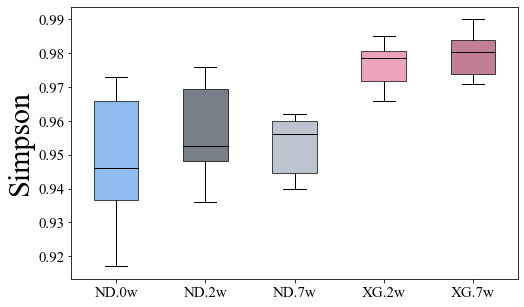

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读文件
df1 = pd.read_excel(r'D:\Work\分析项目\wxy\正式结果整理\16S+宏基因组\α多样性\分析原始数据表\Alpha_Diversity_Index_删点后.xlsx'
                    , header=0, index_col=0, sheet_name='Sheet2')
dfGroup = df1.groupby('GroupByTimeDiet')  # 按'GroupByTimeDiet'分组
df1

# 画图
for i in df1.columns:
    if i != "GroupByTimeDiet":

        """新建列表，通过遍历每个箱子的series，把存储每个箱子的数值的series存进去"""

        boxList = []  # 存储画箱线图用的series

        for key in dfGroup.groups.keys():
            """通过遍历每个组的组名，获得储存每个组的数据的series"""

            boxList.append(df1[i][df1["GroupByTimeDiet"] == key]) # 把xx列中属于aa组的数据添加到列表里，数据类型是series

        """绘图部分"""
        plt.rc('font', family='Times New Roman')  # 修改全局字体为新罗马
        colorList = ["#5EA0E9", "#3E4756", "#A2ACBD", "#E37D9D", "#A9486A"]
        plt.figure(figsize=(8, 5))  # 设置画布的尺寸
        # plt.title(i.capitalize(), fontsize=30, loc='left')  # 设置图表标题，并设定字号大小、位置
        plt.xticks(size=15)
        ylableName = i.capitalize() # 把字符串首字母大写
        plt.ylabel(ylableName,fontdict={'size': 30}) # 设置y轴 坐标名称，位置在y轴左侧
        plt.yticks(size=15)
        boxp = plt.boxplot(boxList, labels=dfGroup.groups.keys(), patch_artist=True, widths=0.5,
                           flierprops={"marker": "o", "markerfacecolor": "white", "markersize": 1},
                           medianprops={'color': 'black', 'linewidth': '1'}, showfliers=False)

        [boxp['boxes'][i].set(facecolor=colorList[i], alpha=0.7) for i in range(len(boxList))]  # 列表表达式设置颜色
        plt.savefig(r'D:\Desktop\\'+i+'.tiff',dpi=300) # 保存文件，需要时使用，防止测试时覆盖


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 读文件
df1 = pd.read_excel(r'D:\Work\分析项目\wxy\正式结果整理\16S+宏基因组\α多样性\分析原始数据表\Alpha_Diversity_Index_删点后.xlsx'
                    , header=0, index_col=None)
dfGroup = df1.groupby('GroupByTimeDiet')  # 按'GroupByTimeDiet'分组
df1
MeanList = []
for i in df1.columns:
    if i != "GroupByTimeDiet" and i != 'Sample_Name':
        MeanList.append(df1.groupby('GroupByTimeDiet')[i].mean())
# 列表里的series合成df
MeanDf = pd.concat(MeanList, axis=1)
# MeanDf.to_excel(r'D:\Work\code\test_file\testfile.xlsx')


for i in MeanDf.columns[0:]:
    print(i)

chao1
dominance
goods_coverage
observed_otus
pielou_e
shannon
simpson


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 读文件
df1 = pd.read_excel(r'D:\Work\分析项目\wxy\正式结果整理\16S+宏基因组\α多样性\分析原始数据表\Alpha_Diversity_Index_删点后.xlsx'
                    , header=0, index_col=None)
dfGroup = df1.groupby('GroupByTimeDiet')  # 按'GroupByTimeDiet'分组


# 画图
for i in df1.columns[2:]:
    """新建列表，通过遍历每个箱子的series，把存储每个箱子的数值的series存进去"""

    boxList = []  # 存储画箱线图用的series

    for key in dfGroup.groups.keys():
        """通过遍历每个组的组名，获得储存每个组的数据的series"""

        boxList.append(df1[i][df1.GroupByTimeDiet == key])


    """绘图部分"""
    plt.rc('font', family='Times New Roman')  # 修改全局字体为新罗马
    colorList = ["#5EA0E9", "#3E4756", "#A2ACBD", "#E37D9D", "#A9486A"]
    plt.figure(figsize=(5, 5))  # 设置画布的尺寸
    plt.title(i.capitalize(), fontsize=30, loc='left')  # 标题，并设定字号大小、位置
    plt.xticks(size=15)
    # ylableName = i.capitalize() # 把字符串首字母大写
    # plt.ylabel(ylableName,fontdict={'size': 20}) # 设置y轴 坐标名称
    plt.yticks(size=15)
    boxp = plt.boxplot(boxList, labels=dfGroup.groups.keys(), patch_artist=True, widths=0.5,
                       flierprops={"marker": "o", "markerfacecolor": "white", "markersize": 1},
                       medianprops={'color': 'black', 'linewidth': '1'}, showfliers=False)

    [boxp['boxes'][i].set(facecolor=colorList[i], alpha=0.7) for i in range(len(boxList))]  # 列表表达式设置颜色
# plt.savefig(r'E:\Work\分析项目\wxy\正式结果整理\16S+宏基因组\16S\文章内容保留\\'+i+'.tiff',dpi=400) # 保存文件，需要时使用，防止测试时覆盖


print(boxList)

[0    0.973
1    0.970
2    0.953
3    0.917
4    0.936
5    0.939
Name: simpson, dtype: float64, 18    0.974
19    0.956
20    0.936
21    0.949
22    0.948
23    0.976
Name: simpson, dtype: float64, 24    0.957
25    0.962
26    0.955
27    0.941
28    0.940
29    0.961
Name: simpson, dtype: float64, 6     0.980
7     0.985
8     0.981
9     0.970
10    0.977
11    0.966
Name: simpson, dtype: float64, 12    0.977
13    0.984
14    0.984
15    0.971
16    0.973
17    0.990
Name: simpson, dtype: float64]


In [23]:
df1.GroupByTimeDiet

0     ND.0w
1     ND.0w
2     ND.0w
3     ND.0w
4     ND.0w
5     ND.0w
6     XG.2w
7     XG.2w
8     XG.2w
9     XG.2w
10    XG.2w
11    XG.2w
12    XG.7w
13    XG.7w
14    XG.7w
15    XG.7w
16    XG.7w
17    XG.7w
18    ND.2w
19    ND.2w
20    ND.2w
21    ND.2w
22    ND.2w
23    ND.2w
24    ND.7w
25    ND.7w
26    ND.7w
27    ND.7w
28    ND.7w
29    ND.7w
Name: GroupByTimeDiet, dtype: object

In [25]:
df1['dominance'][df1.GroupByTimeDiet == 'ND.2w']

18    0.026
19    0.044
20    0.064
21    0.051
22    0.052
23    0.024
Name: dominance, dtype: float64